# **CNN assignment**(Do read the note at the end)

Description: Here we are going to use CNN to classify images of elephants,tigers,cheetah's and crocodiles. Basically multiclass classificiation using CNN.

**Q.1** Import all required modules

In [28]:
#Your code here
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers,models


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
pwd


'/content'

In [9]:
dataset='/content/drive/MyDrive/dataset'


**Q.2** Load data using image_dataset_from_directory(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

In [20]:
data=tf.keras.preprocessing.image_dataset_from_directory(
    dataset,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)
#Your code here

Found 1174 files belonging to 4 classes.




*   Since data object is not iterable,we will create a nummpy iterator for data.
*   Then use batch to iterate through our data



In [21]:
data_iterator=data.as_numpy_iterator()

In [22]:
batch=data_iterator.next()

Run the below code and batch code 2-3 times to visualise the labels given to different animals.

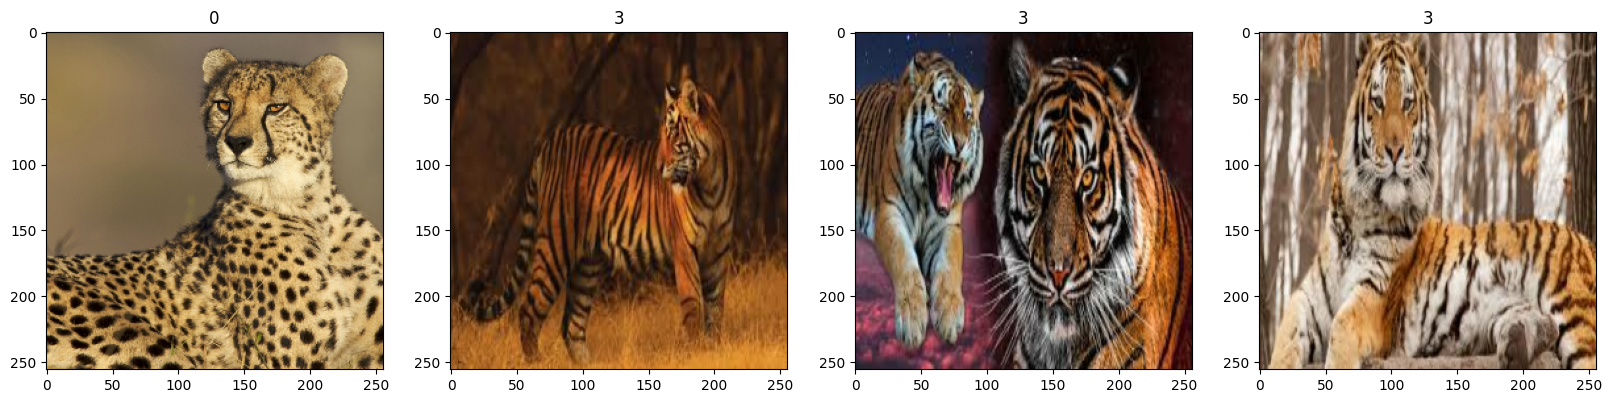

In [23]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

**Q.3** Map the data such that all pixel values lie between 0 and 1 using the **lambda function**

In [25]:
data=data.map(lambda x,y: (tf.cast(x,tf.float32)/255.0,y))


**Q.4** Split the data into train set and test set(and validation set if needed) using **data.take**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-class-take-method/) and **data.skip**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-skip-method/)

In [27]:
#Your code here
num_train=int(len(data)*0.8)
num_val=int(len(data)*0.1)
num_test=int(len(data)*0.1)
train=data.take(num_train)
val=data.skip(num_train).take(num_val)
test=data.skip(num_train+num_val).take(num_test)

**Creating the model**

**Q.5** Write code to create CNN model including fully connected layers with softmax as final layer.

In [29]:
model=models.Sequential()

model.add(layers.Conv2D(32,(5,5),activation='relu',input_shape=(256,256,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(5,5),activation='relu',input_shape=(256,256,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(5,5),activation='relu',input_shape=(256,256,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(4,activation='softmax'))
#Your code here

**Q.6** Compile your model

In [31]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#Your code here

**Q.7** Fit your model with train set and make sure to keep **less epochs**(10-15) as the dataset size is very large.

In [32]:
model.fit(train,epochs=10,validation_data=val,verbose=1)

Epoch 1/10
29/29 [==============================] - 101s 3s/step - loss: 1.4536 - accuracy: 0.3890 - val_loss: 1.0567 - val_accuracy: 0.6354
Epoch 2/10
29/29 [==============================] - 21s 679ms/step - loss: 1.0446 - accuracy: 0.5334 - val_loss: 1.0350 - val_accuracy: 0.3646
Epoch 3/10
29/29 [==============================] - 20s 639ms/step - loss: 0.9069 - accuracy: 0.6304 - val_loss: 0.8561 - val_accuracy: 0.6250
Epoch 4/10
29/29 [==============================] - 22s 693ms/step - loss: 0.6925 - accuracy: 0.7338 - val_loss: 0.5327 - val_accuracy: 0.8542
Epoch 5/10
29/29 [==============================] - 21s 656ms/step - loss: 0.5681 - accuracy: 0.7953 - val_loss: 0.4953 - val_accuracy: 0.8333
Epoch 6/10
29/29 [==============================] - 21s 686ms/step - loss: 0.4910 - accuracy: 0.8190 - val_loss: 0.7103 - val_accuracy: 0.7083
Epoch 7/10
29/29 [==============================] - 20s 632ms/step - loss: 0.3692 - accuracy: 0.8631 - val_loss: 0.3248 - val_accuracy: 0.8854
E

**Q.8** Test your code with test set

In [33]:
loss,accuracy=model.evaluate(test,verbose=1)

3/3 [==============================] - 10s 37ms/step - loss: 0.1589 - accuracy: 0.9479


In [34]:
# Do not change this code
if accuracy>=0.85:
  print("Congratulations, CNN assignment complete!!")
else:
  print("Try again, not enough accuracy")

Congratulations, CNN assignment complete!!


**Note: 1. Many of you will get very high train accuracy but low test accuracy. This is called overfitting, this can be solved by increasing the train set size. If your getting low accuracy for both train and test, modify your layers in the model.**

**2.Do use T4GPU.Ideally your first epoch will take quite sometime and rest of the epochs will be faster but if all your epochs are taking a lot of time, try starting a new gpu session(open a new gmail account and open colab on that) because your free gpu might have exhausted itself.**

**3.Other than that everything should be fine, happy learning!!**